In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# read and merge datasets
data_ohlc = pd.read_csv('sp500.csv')
# data_ohlc['Date'] = pd.to_datetime(data_ohlc['Date'])
# data_ohlc['Date'] = data_ohlc['Date'].dt.strftime("%Y-%m-%d")

data_index = pd.read_csv('sp500_index.csv')

merged = pd.merge(data_ohlc, data_index, on='Date', how='inner')

merged[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = merged[['Open', 'High', 'Low', 'Close*', 'Volume', 'Adj Close**']].replace({',': ''}, regex=True).astype(float)
# merged[['Close', 'Volume']] = merged[['Close*', 'Volume']].astype(float)
# merged = merged.drop(['Close*', 'S&P500', 'Adj Close**'], axis='columns')
merged['Date'] = [int(datetime.strptime(date, '%Y-%m-%d').timestamp()) for date in merged['Date']]

# merged.dropna(inplace=True)
merged.to_csv('form1.csv',index=False)
# pd.read_csv('form1.csv').info()
set = pd.read_csv('form1.csv')
set.head(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume,Return,S&P500,Close,Adj Close
0,1672704000,3853.29,3878.46,3794.33,"3,824.14","3,824.14",3.959140e+09,-15.36,3824.14,3824.14,3824.14
1,1672358400,3829.06,3839.85,3800.34,"3,839.50","3,839.50",2.979870e+09,-9.78,3839.50,3839.50,3839.50
2,1672272000,3805.45,3858.19,3805.45,"3,849.28","3,849.28",3.003680e+09,66.06,3849.28,3849.28,3849.28
3,1672185600,3829.56,3848.32,3780.78,"3,783.22","3,783.22",3.083520e+09,-46.03,3783.22,3783.22,3783.22
4,1672099200,3843.34,3846.65,3813.22,"3,829.25","3,829.25",3.030300e+09,-15.57,3829.25,3829.25,3829.25
5,1671753600,3815.11,3845.80,3797.01,"3,844.82","3,844.82",2.819280e+09,22.43,3844.82,3844.82,3844.82
6,1671667200,3853.26,3853.26,3764.49,"3,822.39","3,822.39",3.956950e+09,-56.05,3822.39,3822.39,3822.39
7,1671580800,3839.49,3889.82,3839.49,"3,878.44","3,878.44",3.775200e+09,56.82,3878.44,3878.44,3878.44
8,1671494400,3810.47,3838.24,3795.62,"3,821.62","3,821.62",3.985370e+09,3.96,3821.62,3821.62,3821.62
9,1671408000,3853.79,3854.86,3800.04,"3,817.66","3,817.66",3.969610e+09,-34.70,3817.66,3817.66,3817.66


In [6]:
set.corr()['Close']

<ipython-input-6-9f83690982b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  set.corr()['Close']


Date         0.865539
Open         0.998632
High         0.999240
Low          0.999337
Volume       0.157841
Return       0.027479
S&P500       1.000000
Close        1.000000
Adj Close    1.000000
Name: Close, dtype: float64

In [ ]:
X = set[['Date', 'Open', 'High', 'Low', 'Volume', 'Close', 'Adj Close']]
# X = set[['Volume', 'S&P500', 'Close', 'Day', 'Month', 'Year']]
y = set['Return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# svm_model = SVR(kernel='poly', degree=2, C=100)# best parameter
svm_model = SVR(kernel='linear')
# svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 1790.62
mean Absolute Error (MAE): 28.78


In [ ]:
X_test['Date'] = [datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d') for timestamp in X_test['Date']]

In [ ]:
import matplotlib.pyplot as plt
quick_test = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
quick_test.head(20)

,Actual,Predicted
326,-6.95,5.397390
290,17.47,4.769143
1101,9.44,6.794012
227,-16.66,2.703139
1145,-2.83,-2.534731
237,12.19,-5.416264
258,47.33,10.202859
376,14.59,5.290810
238,-84.79,-4.735621
1153,1.93,4.509782


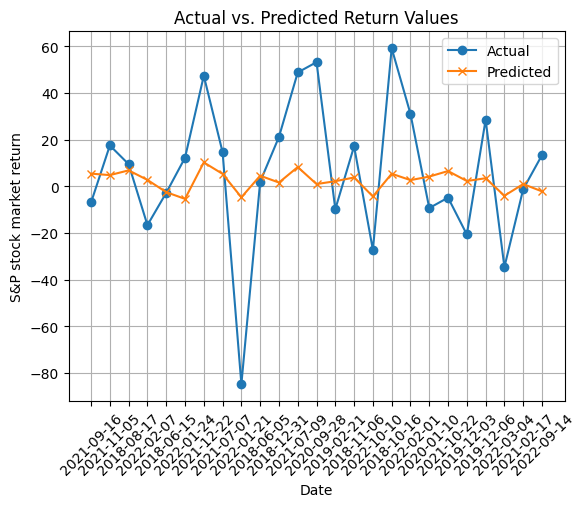

In [ ]:
merged_df = quick_test.join(X_test)
merged_df = merged_df.head(25)
plt.plot(merged_df['Date'], merged_df['Actual'], label='Actual', marker='o')
plt.plot(merged_df['Date'], merged_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('S&P stock market return')
plt.title('Actual vs. Predicted Return Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# X_test['Date'] = [datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d') for timestamp in X_test['Date']]
# merged_df = quick_test.join(X_test)
# merged_df.set_index('Date', inplace=True)
# graph = merged_df.head(25)
# graph.plot(kind='bar')
# plt.xlabel('Date')
# plt.ylabel('S&P stock market return')
# plt.title('Actual vs. Predicted Return Values')
# plt.legend()
# plt.xticks(rotation=45)
# plt.grid()
# plt.show()

Text(0.5, 1.0, 'Actual vs. Predicted Return Values')

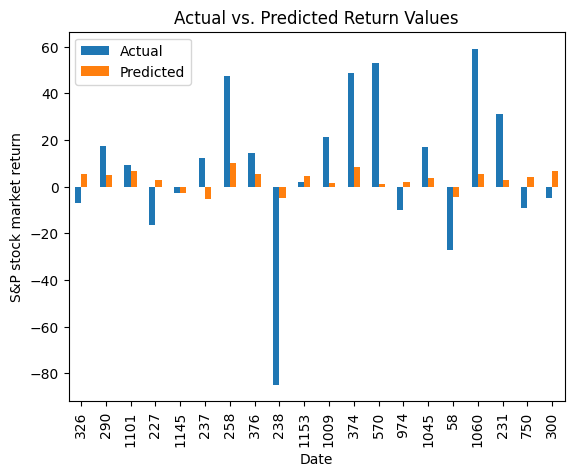

In [ ]:
graph = quick_test.head(20)
graph.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('S&P stock market return')
plt.title('Actual vs. Predicted Return Values')

****************WITH OTHER DATA************************

In [ ]:
# read and merge datasets
data_ohlc = pd.read_csv('sp500.csv')
# data_ohlc['Date'] = pd.to_datetime(data_ohlc['Date'])
# data_ohlc['Date'] = data_ohlc['Date'].dt.strftime("%Y-%m-%d")

data_index = pd.read_csv('sp500_index.csv')
merged = pd.merge(data_ohlc, data_index, on='Date', how='inner')

merged[['Open','High', 'Low', 'Adj Close', 'Close', 'Volume']] = merged[['Open','High', 'Low', 'Adj Close**', 'Close*', 'Volume']].replace({',': ''}, regex=True).astype(float)
# merged[['Open','High', 'Low', 'Adj Close**', 'Close', 'Volume']] = merged[['Close*', 'Volume']].astype(float)
merged = merged.drop(['Adj Close**', 'Close*', 'S&P500'], axis='columns')

# merged.dropna(inplace=True)
print(merged)

            Date     Open     High      Low        Volume  Return  Adj Close  \
0     2023-01-03  3853.29  3878.46  3794.33  3.959140e+09  -15.36    3824.14   
1     2022-12-30  3829.06  3839.85  3800.34  2.979870e+09   -9.78    3839.50   
2     2022-12-29  3805.45  3858.19  3805.45  3.003680e+09   66.06    3849.28   
3     2022-12-28  3829.56  3848.32  3780.78  3.083520e+09  -46.03    3783.22   
4     2022-12-27  3843.34  3846.65  3813.22  3.030300e+09  -15.57    3829.25   
...          ...      ...      ...      ...           ...     ...        ...   
1255  2018-01-08  2742.67  2748.51  2737.60  3.246160e+09    4.56    2747.71   
1256  2018-01-05  2731.33  2743.45  2727.92  3.239280e+09   19.16    2743.15   
1257  2018-01-04  2719.31  2729.29  2719.07  3.697340e+09   10.93    2723.99   
1258  2018-01-03  2697.85  2714.37  2697.77  3.544030e+09   17.25    2713.06   
1259  2018-01-02  2683.73  2695.89  2682.36  3.397430e+09   22.20    2695.81   

        Close  
0     3824.14  
1     3

In [ ]:
data_news = pd.read_csv('sp500_news.csv')
merged_data = pd.merge(merged, data_news, on='Date', how='inner')
# merged_data['Date'] = pd.to_datetime(merged_data['Date'])
# merged_data['Day'] = merged_data['Date'].dt.day
# merged_data['Month'] = merged_data['Date'].dt.month
# merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Date'] = [int(datetime.strptime(date, '%Y-%m-%d').timestamp()) for date in merged_data['Date']]
print(merged_data)

merged_data.info()
merged_data.isnull().sum()

           Date     Open     High      Low        Volume  Return  Adj Close  \
0    1591833600  3123.53  3123.53  2999.49  7.037320e+09 -188.04    3002.10   
1    1591747200  3213.42  3223.27  3181.49  6.598870e+09  -17.04    3190.14   
2    1591660800  3213.32  3222.71  3193.11  6.410930e+09  -25.21    3207.18   
3    1591574400  3199.92  3233.13  3196.00  8.498300e+09   38.46    3232.39   
4    1591315200  3163.84  3211.72  3163.84  8.639300e+09   81.58    3193.93   
..          ...      ...      ...      ...           ...     ...        ...   
610  1515369600  2742.67  2748.51  2737.60  3.246160e+09    4.56    2747.71   
611  1515110400  2731.33  2743.45  2727.92  3.239280e+09   19.16    2743.15   
612  1515024000  2719.31  2729.29  2719.07  3.697340e+09   10.93    2723.99   
613  1514937600  2697.85  2714.37  2697.77  3.544030e+09   17.25    2713.06   
614  1514851200  2683.73  2695.89  2682.36  3.397430e+09   22.20    2695.81   

       Close  Positive  Negative   Neutral  Price_c

Date            0
Open            0
High            0
Low             0
Volume          0
Return          0
Adj Close       0
Close           0
Positive        0
Negative        0
Neutral         0
Price_change    0
dtype: int64

In [ ]:
merged_data.loc[:, 'ma20'] = merged_data.Close.rolling(20).mean()
merged_data.dropna(inplace=True)

# merged_data.loc[:, "rsi"] = talib.RSI(merged_data.Close, 14)
# print(merged_data)

merged_data.to_csv('form1.csv',index=False)
# pd.read_csv('form1.csv').info()
set = pd.read_csv('form1.csv')
# set = set.drop(['Price_change'], axis='columns')
set.head(10)

,Date,Open,High,Low,Volume,Return,Adj Close,Close,Positive,Negative,Neutral,Price_change,ma20
0,1589414400,2794.54,2852.80,2766.64,5.651130e+09,32.50,2852.50,2852.50,0.202053,0.104108,0.693839,1,3038.4035
1,1589328000,2865.86,2874.14,2793.15,6.151650e+09,-50.12,2820.00,2820.00,0.217852,0.200098,0.582050,-1,3029.2985
2,1589241600,2939.50,2945.82,2869.59,5.119630e+09,-60.07,2870.12,2870.12,0.160295,0.077055,0.762650,-1,3013.2975
3,1589155200,2915.46,2944.25,2903.44,4.819730e+09,0.39,2930.19,2930.19,0.184708,0.111766,0.703526,1,2999.4480
4,1588896000,2908.83,2932.16,2902.88,4.876030e+09,48.61,2929.80,2929.80,0.314460,0.095021,0.590519,1,2984.3185
5,1588809600,2878.26,2901.92,2876.48,5.178790e+09,32.77,2881.19,2881.19,0.259160,0.147297,0.593543,1,2968.6815
6,1588723200,2883.14,2891.11,2847.65,4.892570e+09,-20.02,2848.42,2848.42,0.216149,0.114559,0.669292,-1,2955.4850
7,1588636800,2868.88,2898.23,2863.55,5.140290e+09,25.70,2868.44,2868.44,0.324001,0.095669,0.580330,1,2942.7635
8,1588550400,2815.01,2844.24,2797.85,4.735930e+09,12.03,2842.74,2842.74,0.318035,0.108453,0.573512,1,2930.8595
9,1588291200,2869.09,2869.09,2821.61,4.759810e+09,-81.72,2830.71,2830.71,0.187233,0.359049,0.453717,-1,2919.6085


In [ ]:
# merged['Date'] = pd.to_datetime(merged['Date'])
# merged['Day'] = merged['Date'].dt.day
# merged['Month'] = merged['Date'].dt.month
# merged['Year'] = merged['Date'].dt.year
# print(merged)

# merged.to_csv('form1.csv',index=False)
# # pd.read_csv('form1.csv').info()
# set = pd.read_csv('form1.csv')
# set.head()

In [ ]:
X = set[['Date', 'Open','High', 'Low', 'Volume', 'Adj Close', 'Positive', 'Negative', 'Price_change', 'Neutral', 'ma20', 'Close']]
# X = set[['Volume', 'S&P500', 'Close', 'Day', 'Month', 'Year']]
y = set['Return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# svm_model = SVR(kernel='poly', degree=3, C=100)# best parameter
svm_model = SVR(kernel='linear')
# svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 415.98
Mean Absolute Error (MAE): 13.93


In [ ]:
quick_test = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
quick_test.head(20)

,Actual,Predicted
228,8.71,12.470199
157,14.95,10.933563
543,-39.09,-14.925421
467,23.21,18.101486
163,-14.72,-11.529882
345,21.11,17.920783
310,-9.82,-9.871308
65,5.66,11.605153
53,-24.54,-38.064555
363,30.20,17.454317


In [ ]:
merged_df = quick_test.join(X_test)
merged_df = merged_df.drop([ 'Open','High', 'Low', 'Volume', 'Adj Close', 'Positive', 'Negative', 'Neutral', 'ma20', 'Close'], axis='columns')
merged_df['Date'] = [datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d') for timestamp in merged_df['Date']]
merged_df

,Actual,Predicted,Date,Price_change
228,8.71,12.470199,2019-06-19,1
157,14.95,10.933563,2019-09-30,1
543,-39.09,-14.925421,2018-03-19,-1
467,23.21,18.101486,2018-07-06,1
163,-14.72,-11.529882,2019-09-20,-1
...,...,...,...,...
348,116.60,33.186884,2018-12-26,1
480,-5.91,-1.609366,2018-06-18,-1
398,38.76,16.891868,2018-10-12,1
117,23.35,16.620362,2019-11-25,1


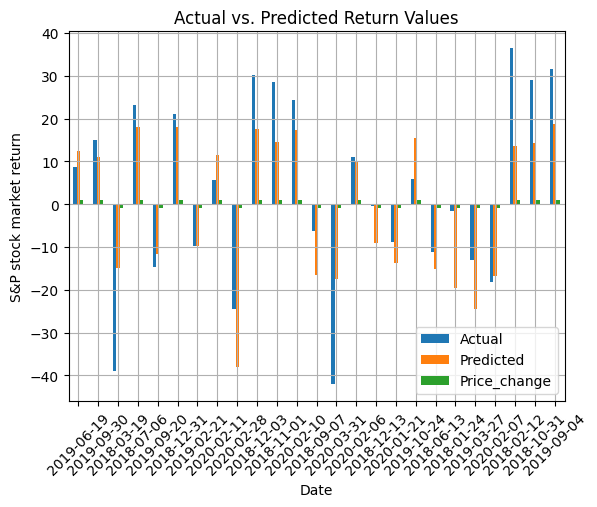

In [ ]:
merged_df.set_index('Date', inplace=True)

# Create the bar chart
graph = merged_df.head(25)
graph.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('S&P stock market return')
plt.title('Actual vs. Predicted Return Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
X_test['Date'] = [datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d') for timestamp in X_test['Date']]

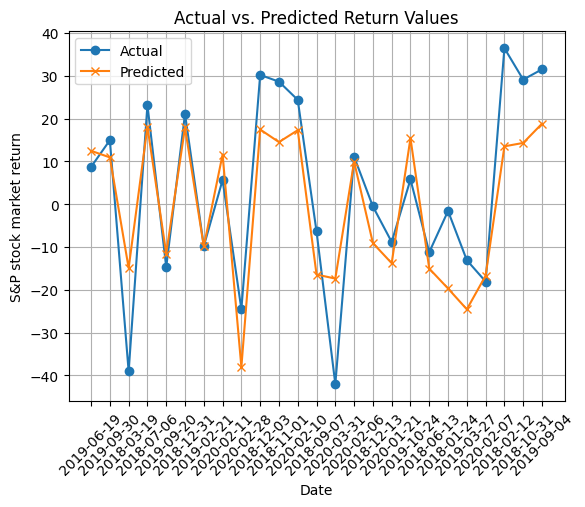

In [ ]:
merged_df = quick_test.join(X_test)
merged_df = merged_df.head(25)
plt.plot(merged_df['Date'], merged_df['Actual'], label='Actual', marker='o')
plt.plot(merged_df['Date'], merged_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('S&P stock market return')
plt.title('Actual vs. Predicted Return Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# 'Volume', 'S&P500', 'Positive', 'Negative', 'Neutral', 'Price_change', 'Day', 'Month', 'Year', 'ma20', 'Close'
new_features = ['5228630000', '2823.16', '0.160252', '0.284604', '0.555145 ', '-1', '20', '4', '2020' ,'2856.8213', '2823.16']
new_features_scaled = scaler.transform([new_features])
new_features_2d = new_features_scaled.reshape(1, -1)
predicted_return = svm_model.predict(new_features_2d)
print("Predicted Close:", predicted_return[0])

Predicted Close: -23.39350825280804


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# merged_df.sort_values(by='Date', inplace=True)
# merged_df['Daily_Return'] = merged_df['Close'].pct_change()
# merged_df.dropna(subset=['Daily_Return'], inplace=True)
# print(merged_df)

4/20/2020
volume-5228630000 close-2823.16 index-2823.16 positi-0.160252 negtive-0.284604 neutral-0.555145 pricechange-(-1) day-20 month-4 year-2020 ma20-2856.8213
expceted(-51.4)